## Dashboard for SpaceX

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Input,Output,callback,dcc,html
import wget

In [584]:
spaceX_df=pd.read_csv("spacex_launch_dash.csv")

In [585]:
spaceX_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [18]:
spaceX_df.drop('Unnamed: 0',axis=1,inplace=True)

In [442]:
spaceX_df['class']= spaceX_df['class'].astype('object')

In [586]:
spaceX_df['class'].dtypes

dtype('int64')

In [594]:
Launch_site=spaceX_df['Launch Site'].unique()
options=[]
options=[{'label':a,'value':a} for a in Launch_site]
options.append({'label':'ALL','value':'ALL'})

options

[{'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
 {'label': 'ALL', 'value': 'ALL'}]

In [683]:
app=dash.Dash(__name__)


app.layout=html.Div(children=[html.H1('SpaceX Launch Records Dashboard',style={'textAlign':'center','color':'#000500','font-size':'40px'}),
                             html.Div(dcc.Dropdown(id='all_site_dropdown',options=options,value='ALL',placeholder='Launch Site',searchable=True,style={'width':'50%','border-radius':'10px'})),
html.Div(dcc.Graph(id='pie_chart')),
html.Div([html.P('Payload Mass (kg):',style={'color':'white'}),dcc.RangeSlider(id='payload_slider',
                min=0, max=10000, step=10,
                marks={0: {'label':'MIN','style':{'color':'blue'}},10000: {'label':'MAX','style':{'color':'green'}}},
                value=[spaceX_df['Payload Mass (kg)'].min(),spaceX_df['Payload Mass (kg)'].max() ])
          
          
          
          ,html.Br()]),
                              
html.Div(dcc.Graph(id='success_payload_scatter_chart')),
                             
                             
                             ])
                             
                             

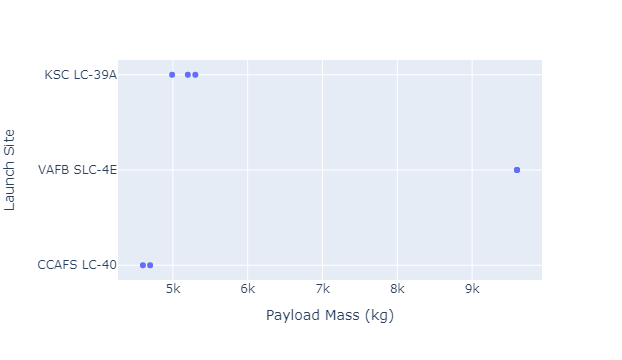

In [681]:
# import seaborn as sns
payL=spaceX_df[(spaceX_df['class']==1) & (spaceX_df['Payload Mass (kg)']>float(4000))]
px.scatter(payL,x='Payload Mass (kg)',y='Launch Site')

In [685]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='pie_chart', component_property='figure'),
              Input(component_id='all_site_dropdown', component_property='value'))
# pie_=spacex_df[]
def get_pie_chart(entered_site):
    filtered_df = spaceX_df
    if entered_site == 'ALL':
        fig = px.pie(spaceX_df,names='Launch Site', values='class',title=f'Failed and Success Ratio of {entered_site}')
        return fig
    else:
        
        __=spaceX_df[spaceX_df['Launch Site']==entered_site].groupby(['Launch Site','class']).size().reset_index(name='counts')
        fig=px.pie(__,names='class', values='counts',hover_name='Launch Site',title=f'Failed and Success Ratio of {entered_site}')
        return fig

@app.callback(Output(component_id='payload_slider',component_property='value'),
  Input(component_id='success_payload_scatter_chart', component_property='figure'))
def payloader_slide(mass):
    payL=spaceX_df[(spaceX_df['class']==1) & (spaceX_df['Payload Mass (kg)']>float(mass))]
    fig=px.scatter(data=payL,x='Payload Mass (kg)',y='Launch Site')
    return fig

        # return the outcomes piechart for a selected site
if __name__=='__main__':
    app.run_server(port=8081,host= '127.0.0.1')

In [24]:
max_spaceX=spaceX_df.groupby('Launch Site')['Payload Mass (kg)'].max()
min_spaceX=spaceX_df.groupby('Launch Site')['Payload Mass (kg)'].min()

In [464]:
ksc=spaceX_df['Launch Site'].value_counts()
ksc

CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: Launch Site, dtype: int64

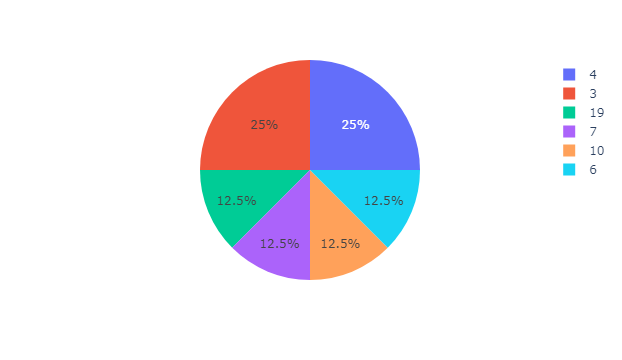

In [460]:
px.pie(ksc,names='')

In [422]:
avg_class=spaceX_df['class'].value_counts().reset_index()
# all_class=spaceX_df.groupby('Launch Site')['class'].mean()
# all_class=all_class.unstack().reset_index()
avg_class

,index,class
0,0,32
1,1,24


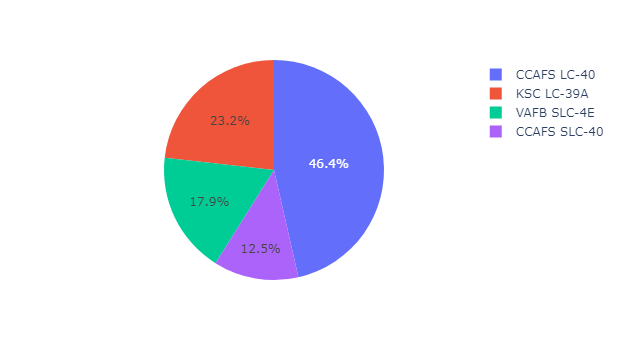

In [388]:
px.pie(avg_class,values='Launch Site',names='index')